>Batch Normalization (BN) is a technique used in deep learning to make neural networks train faster and more stable by normalizing the inputs of each layer.


> Why Batch Normalization is Needed

>During training, as weights keep changing, the distribution of layer inputs also changes — this is called Internal Covariate Shift.
It slows down training and makes it harder for the network to converge.

>Batch Normalization reduces this effect by keeping the input distribution of each layer stable.

>the line forces TensorFlow to run in eager mode, which is required for operations like numpy() inside BatchNormalization.

In [2]:
import tensorflow as tf
tf.config.run_functions_eagerly(True)

In [18]:


import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, BatchNormalization, ReLU
from tensorflow.keras.optimizers import Adam


X, y = make_moons(n_samples=1000, noise=0.2, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



In [20]:

model_no_bn = Sequential([
    Dense(16, input_shape=(2,), activation='relu'),
    Dense(8, activation='relu'),
    Dense(1, activation='sigmoid')
])

model_bn = Sequential()
model_bn.add(Dense(16, activation='relu', input_dim=2))
model_bn.add(BatchNormalization())
model_bn.add(Dense(8, activation='relu'))
model_bn.add(BatchNormalization())
model_bn.add(Dense(1, activation='sigmoid'))


opt1 = Adam(learning_rate=0.01)
opt2 = Adam(learning_rate=0.01)


model_no_bn.compile(optimizer=opt1, loss='binary_crossentropy', metrics=['accuracy'])
model_bn.compile(optimizer=opt2, loss='binary_crossentropy', metrics=['accuracy'])

In [21]:
model_no_bn.summary()

Model: "sequential_17"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_51 (Dense)                │ (None, 16)             │            48 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_52 (Dense)                │ (None, 8)              │           136 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_53 (Dense)                │ (None, 1)              │             9 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 193 (772.00 B)

 Trainable params: 193 (772.00 B)

 Non-trainable params: 0 (0.00 B)

In [22]:
model_bn.summary()

Model: "sequential_18"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_54 (Dense)                │ (None, 16)             │            48 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_18          │ (None, 16)             │            64 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_55 (Dense)                │ (None, 8)              │           136 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_19          │ (None, 8)              │            32 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_56 (Dense)                │ (None, 1)              │             9 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 289 (1.13 KB)

 Trainable params: 241 (964.00 B)

 Non-trainable params: 48 (192.00 B)

In [23]:

history_no_bn = model_no_bn.fit(X_train, y_train, epochs=50, batch_size=32, verbose=0, validation_split=0.2)
history_bn = model_bn.fit(X_train, y_train, epochs=50, batch_size=32, verbose=0, validation_split=0.2)


In [24]:
print("Without Batch Normalization:")
model_no_bn.evaluate(X_test, y_test)

print("\nWith Batch Normalization:")
model_bn.evaluate(X_test, y_test)



Without Batch Normalization:
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9650 - loss: 0.0674

With Batch Normalization:
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9750 - loss: 0.0535


[0.0534808486700058, 0.9750000238418579]

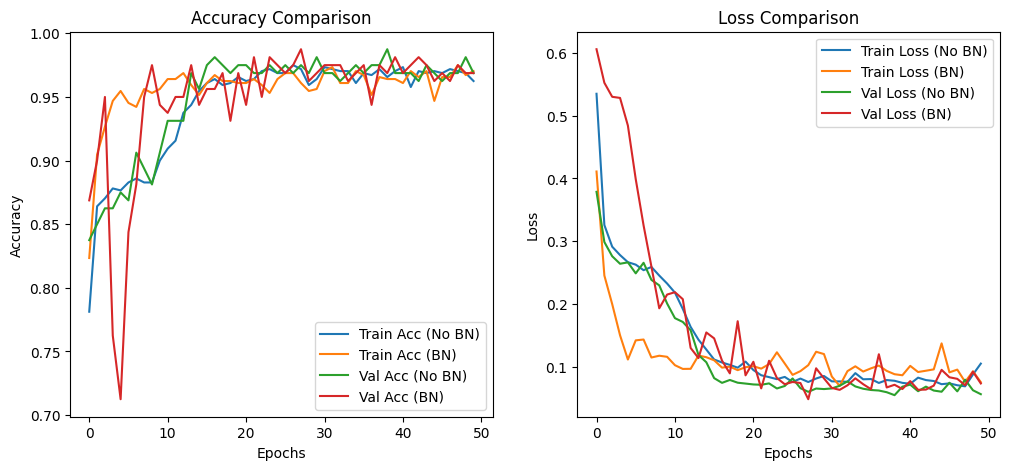

In [25]:
plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
plt.plot(history_no_bn.history['accuracy'], label='Train Acc (No BN)')
plt.plot(history_bn.history['accuracy'], label='Train Acc (BN)')
plt.plot(history_no_bn.history['val_accuracy'], label='Val Acc (No BN)')
plt.plot(history_bn.history['val_accuracy'], label='Val Acc (BN)')
plt.title("Accuracy Comparison")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()

plt.subplot(1,2,2)
plt.plot(history_no_bn.history['loss'], label='Train Loss (No BN)')
plt.plot(history_bn.history['loss'], label='Train Loss (BN)')
plt.plot(history_no_bn.history['val_loss'], label='Val Loss (No BN)')
plt.plot(history_bn.history['val_loss'], label='Val Loss (BN)')
plt.title("Loss Comparison")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()

plt.show()